In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os


for dirname, _, filenames in os.walk('C:\\Users\\Smile\\1_Hackathon_code'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Smile\1_Hackathon_code\alzheimers_disease_data.csv
C:\Users\Smile\1_Hackathon_code\alzheimers_prediction.ipynb
C:\Users\Smile\1_Hackathon_code\Brain Tumor Detection.ipynb
C:\Users\Smile\1_Hackathon_code\.ipynb_checkpoints\alzheimers_prediction-checkpoint.ipynb
C:\Users\Smile\1_Hackathon_code\.ipynb_checkpoints\Brain Tumor Detection-checkpoint.ipynb


In [5]:
df = pd.read_csv("./alzheimers_disease_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [8]:
# Numeric Features
print(f"Number of Numeric Features: {len(df.select_dtypes(include=['int', 'float']).columns)}")
print("-"*50)
print(f"Numeric Feature's Name: \n{df.select_dtypes(include=['int', 'float']).columns}")

Number of Numeric Features: 34
--------------------------------------------------
Numeric Feature's Name: 
Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


In [9]:
# Categorical Features
print(f"Number of Categorical Features: {len(df.select_dtypes(include=['object']).columns)}")
print("-"*50)
print(f"Categorical Feature's Name: \n{df.select_dtypes(include=['object']).columns}")

Number of Categorical Features: 1
--------------------------------------------------
Categorical Feature's Name: 
Index(['DoctorInCharge'], dtype='object')


In [10]:
# As it is obiviously clear that DoctorInCharge variable does not provide
# Any insightful information, we can drop this variable.
df = df.drop(columns=['DoctorInCharge'], axis=1)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [11]:
df.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [12]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [15]:
mean_stats = df.groupby('Diagnosis').mean()

# Display result
mean_stats.to_csv("stats-by-diagnosis.csv")

In [16]:
df.groupby('Diagnosis').agg(['mean']).T

,Diagnosis,0,1
PatientID,mean,5806.177106,5859.401316
Age,mean,74.945284,74.842105
Gender,mean,0.514039,0.492105
Ethnicity,mean,0.708423,0.677632
EducationLevel,mean,1.316055,1.232895
BMI,mean,27.515092,27.912670
Smoking,mean,0.290137,0.285526
AlcoholConsumption,mean,10.071880,9.980156
PhysicalActivity,mean,4.907640,4.943160
DietQuality,mean,4.974839,5.026581


In [17]:
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

In [18]:
numeric_features = [col for col in df.columns if col not in categorical_features]

In [19]:
print(f"Numeric Features: {len(numeric_features)}")
print("-"*50)
print(f"Categorical Features: {len(categorical_features)}")

Numeric Features: 12
--------------------------------------------------
Categorical Features: 22


In [20]:
def countplot(col):
    plt.figure(figsize=(6, 5))
    sns.set_style("darkgrid")
    sns.countplot(data=df,
                x=col,
                palette='dark',
                width=0.5)
    plt.title(f"{col}'s Countplot",
              fontsize=14,
              weight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.show()

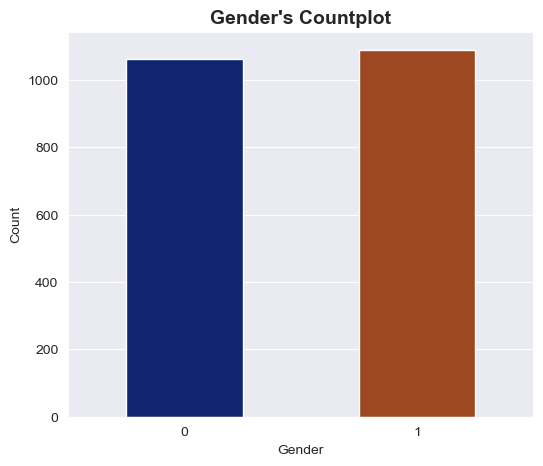

In [21]:
countplot("Gender")

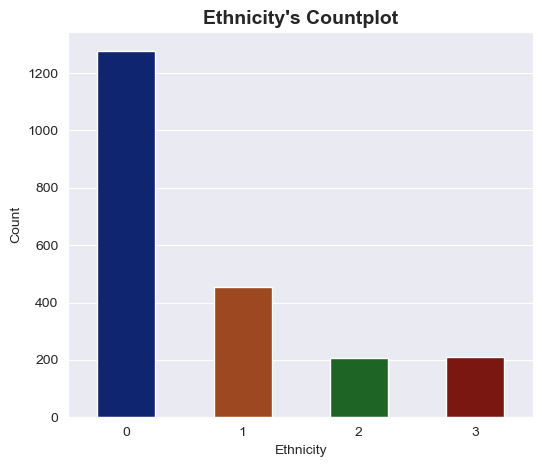

In [22]:
countplot("Ethnicity")

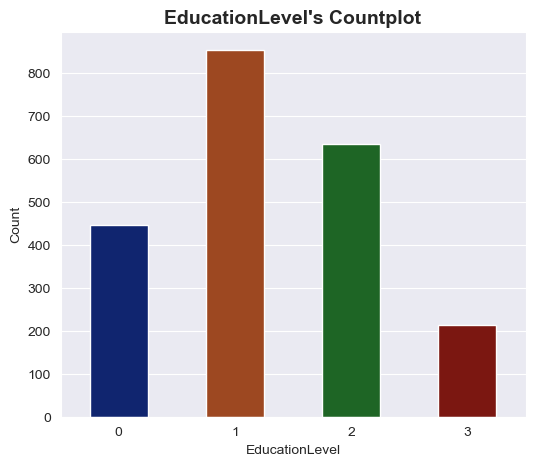

In [23]:
countplot("EducationLevel")

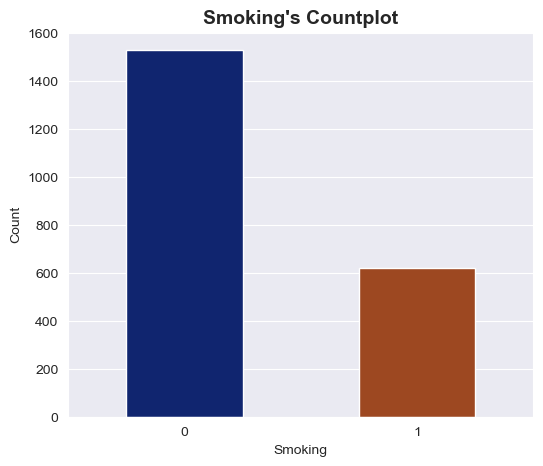

In [24]:
countplot("Smoking")

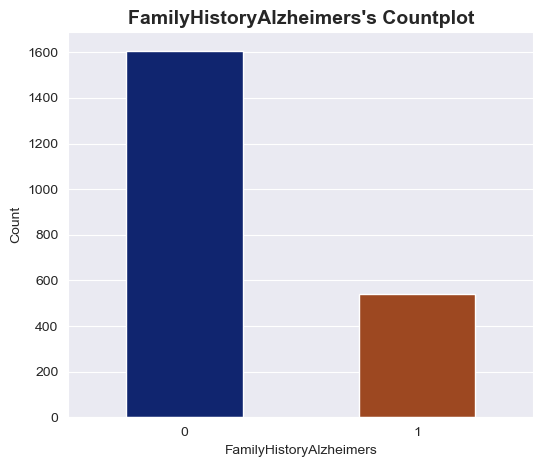

In [25]:
countplot("FamilyHistoryAlzheimers")

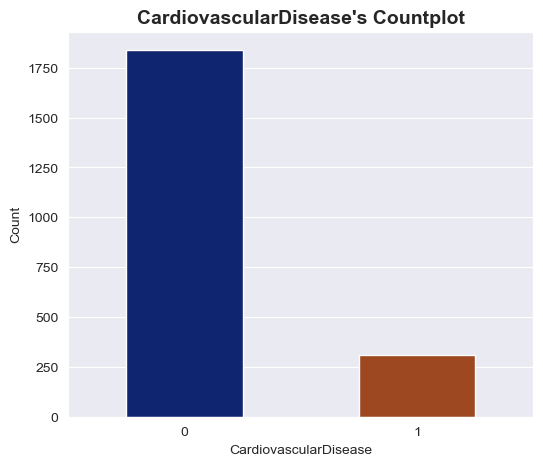

In [26]:
countplot("CardiovascularDisease")

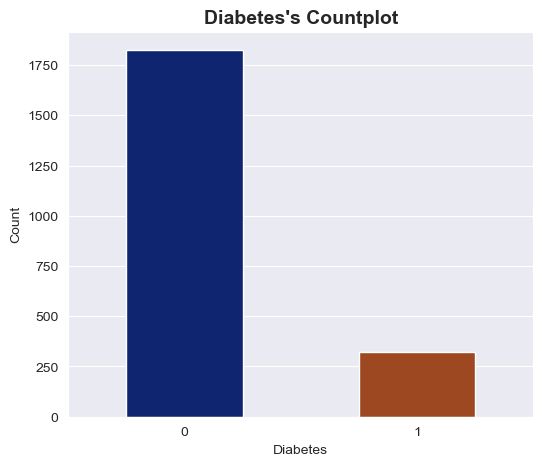

In [27]:
countplot("Diabetes")

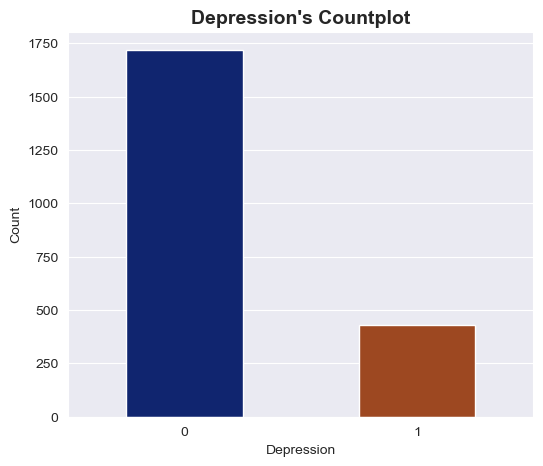

In [28]:
countplot("Depression")

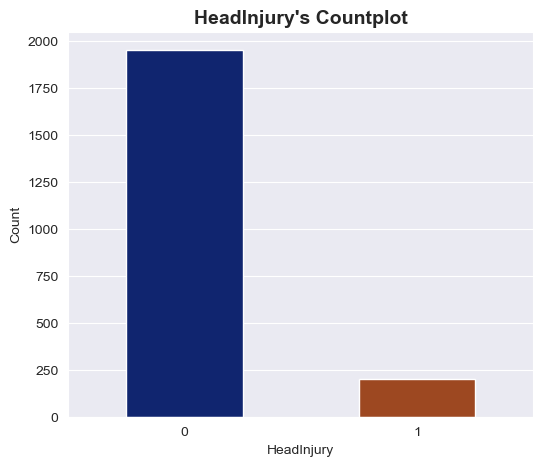

In [29]:
countplot("HeadInjury")

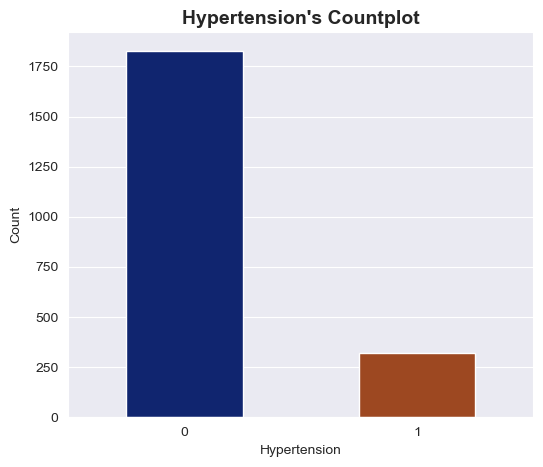

In [30]:
countplot("Hypertension")

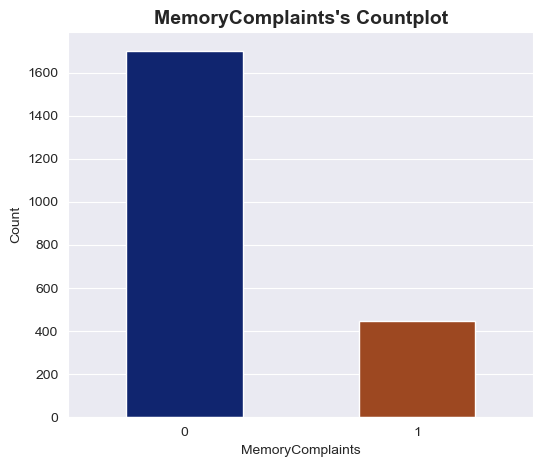

In [31]:
countplot("MemoryComplaints")

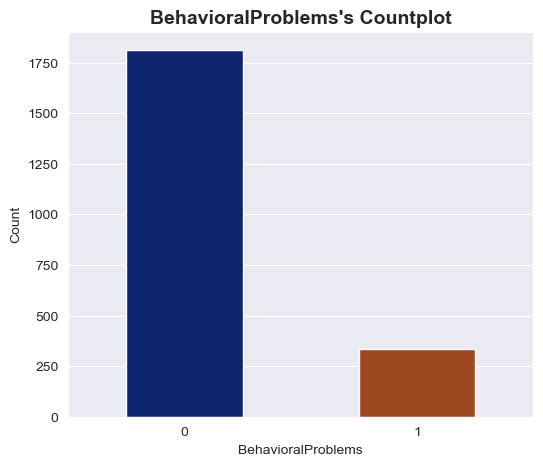

In [32]:
countplot("BehavioralProblems")

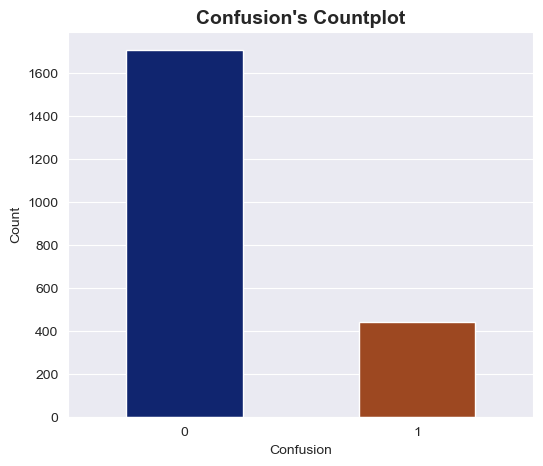

In [33]:
countplot("Confusion")

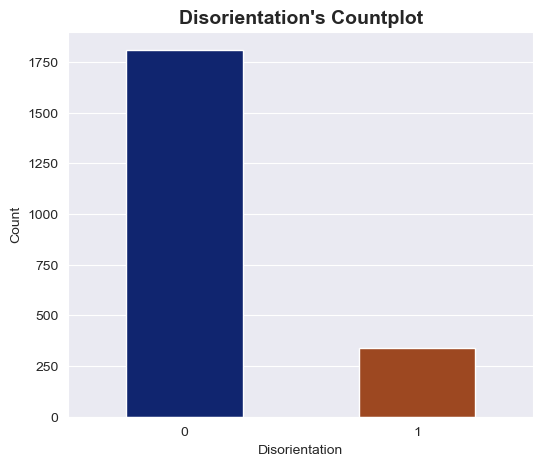

In [34]:
countplot("Disorientation")

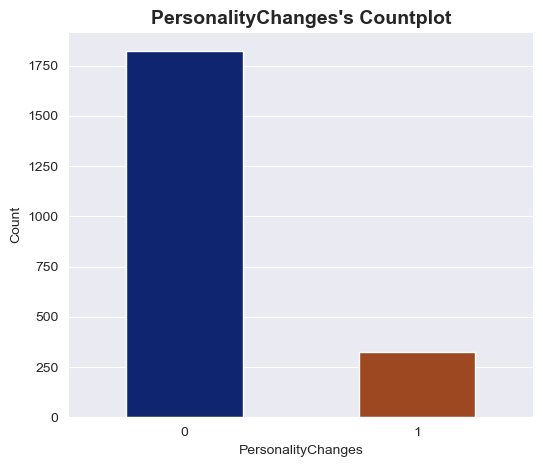

In [35]:
countplot("PersonalityChanges")

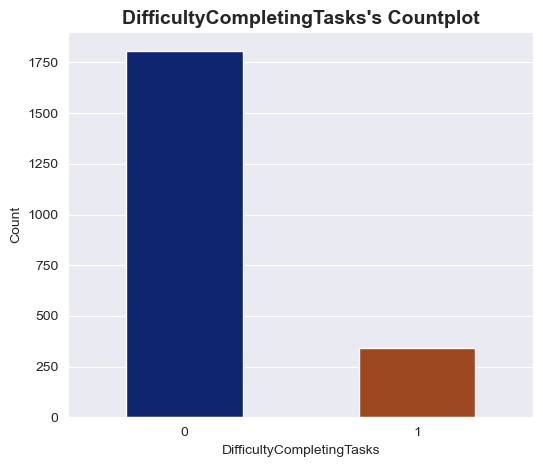

In [36]:
countplot("DifficultyCompletingTasks")

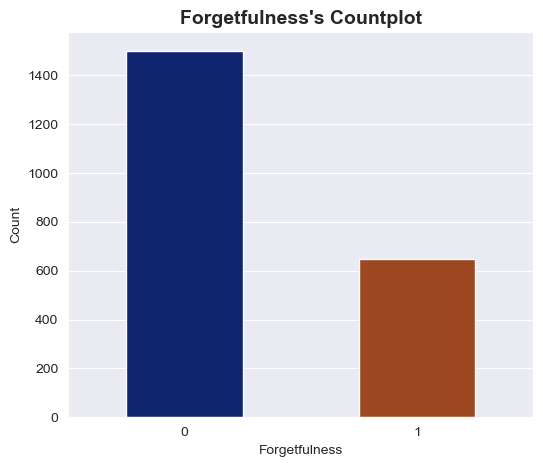

In [37]:
countplot("Forgetfulness")

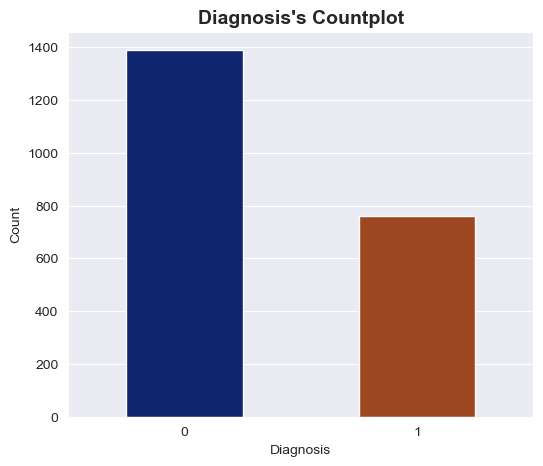

In [38]:
countplot("Diagnosis")

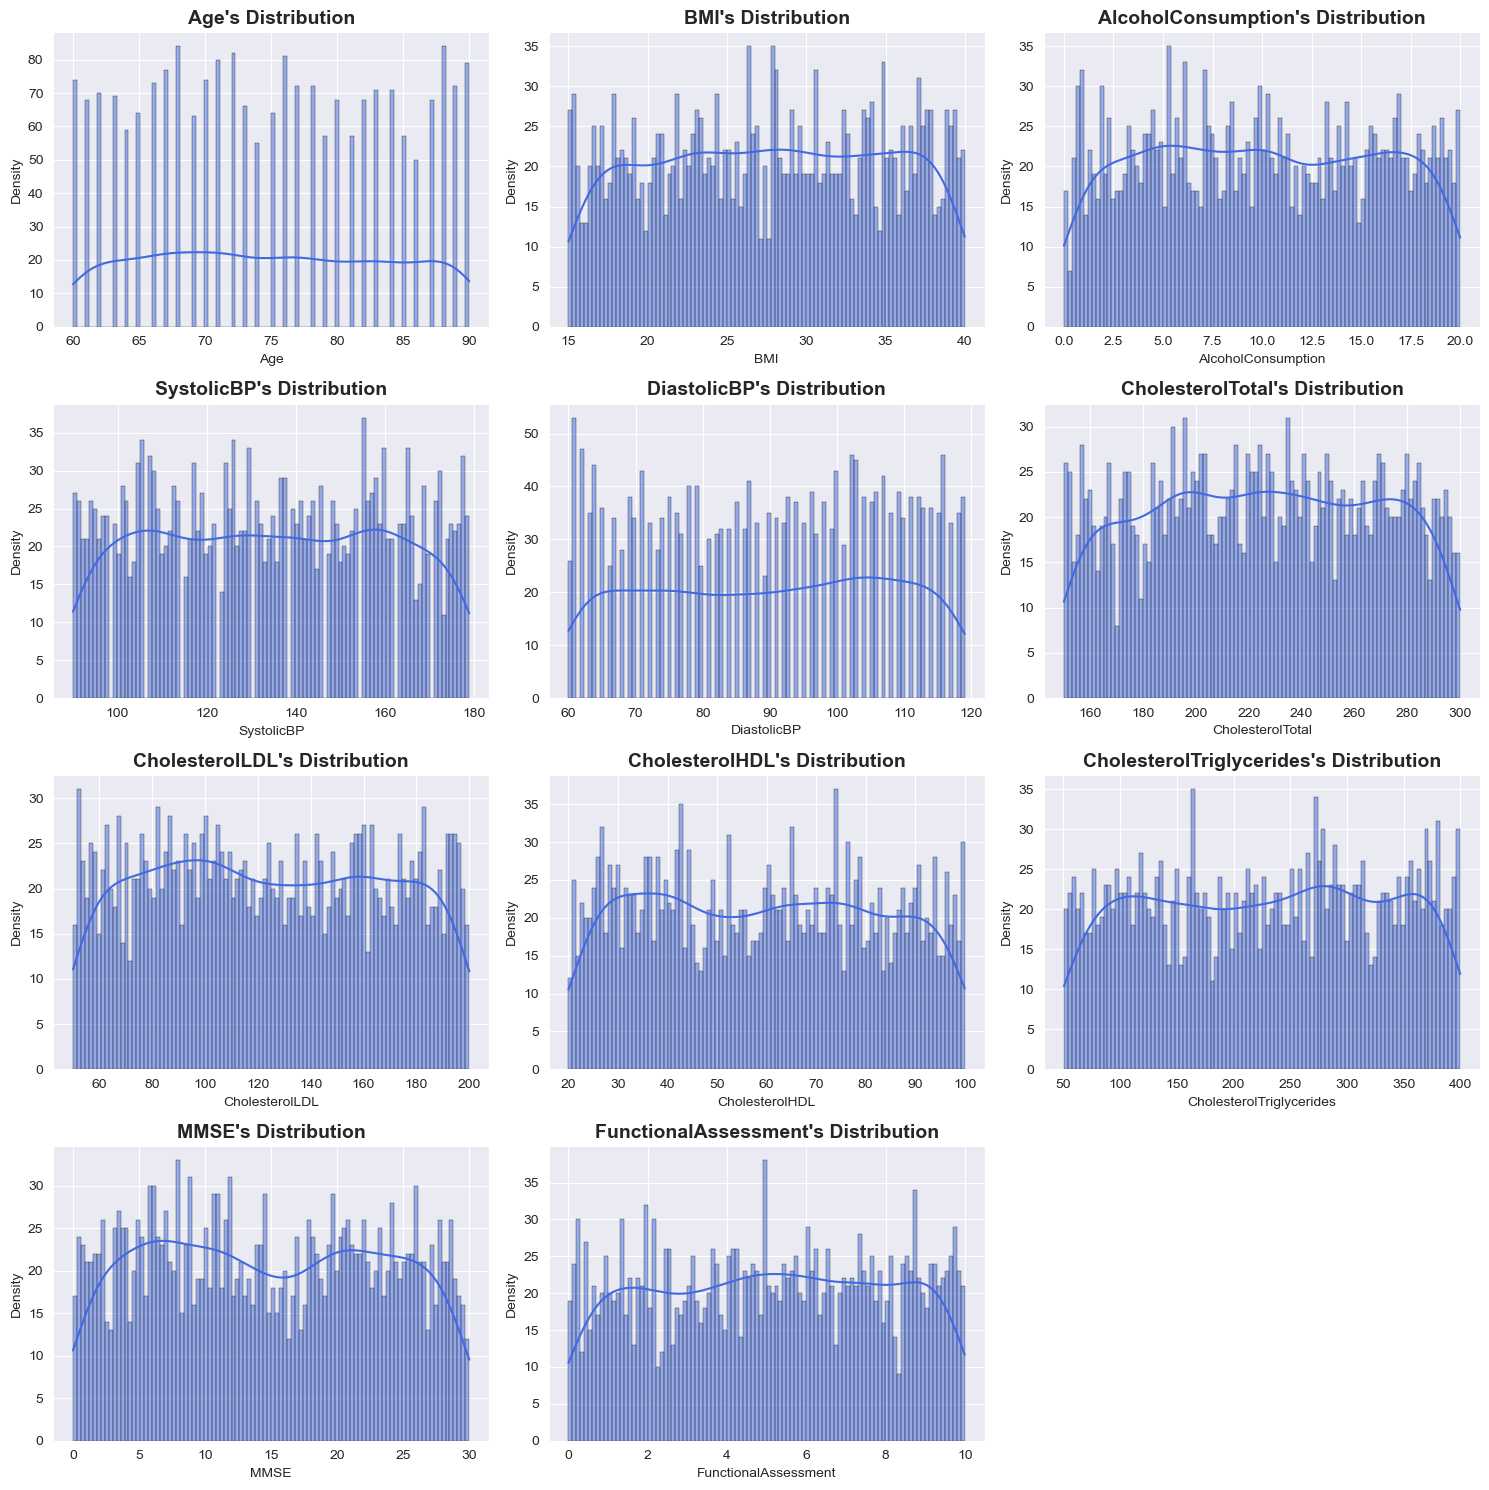

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
for i, var in enumerate(numeric_features[1:], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[var],
                 bins=100,
                 kde=True,
                 color='royalblue',
                 edgecolor='black')
    plt.title(f"{var}'s Distribution",
              fontsize=14,
              weight="bold")
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Density", fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig('distributions.png')

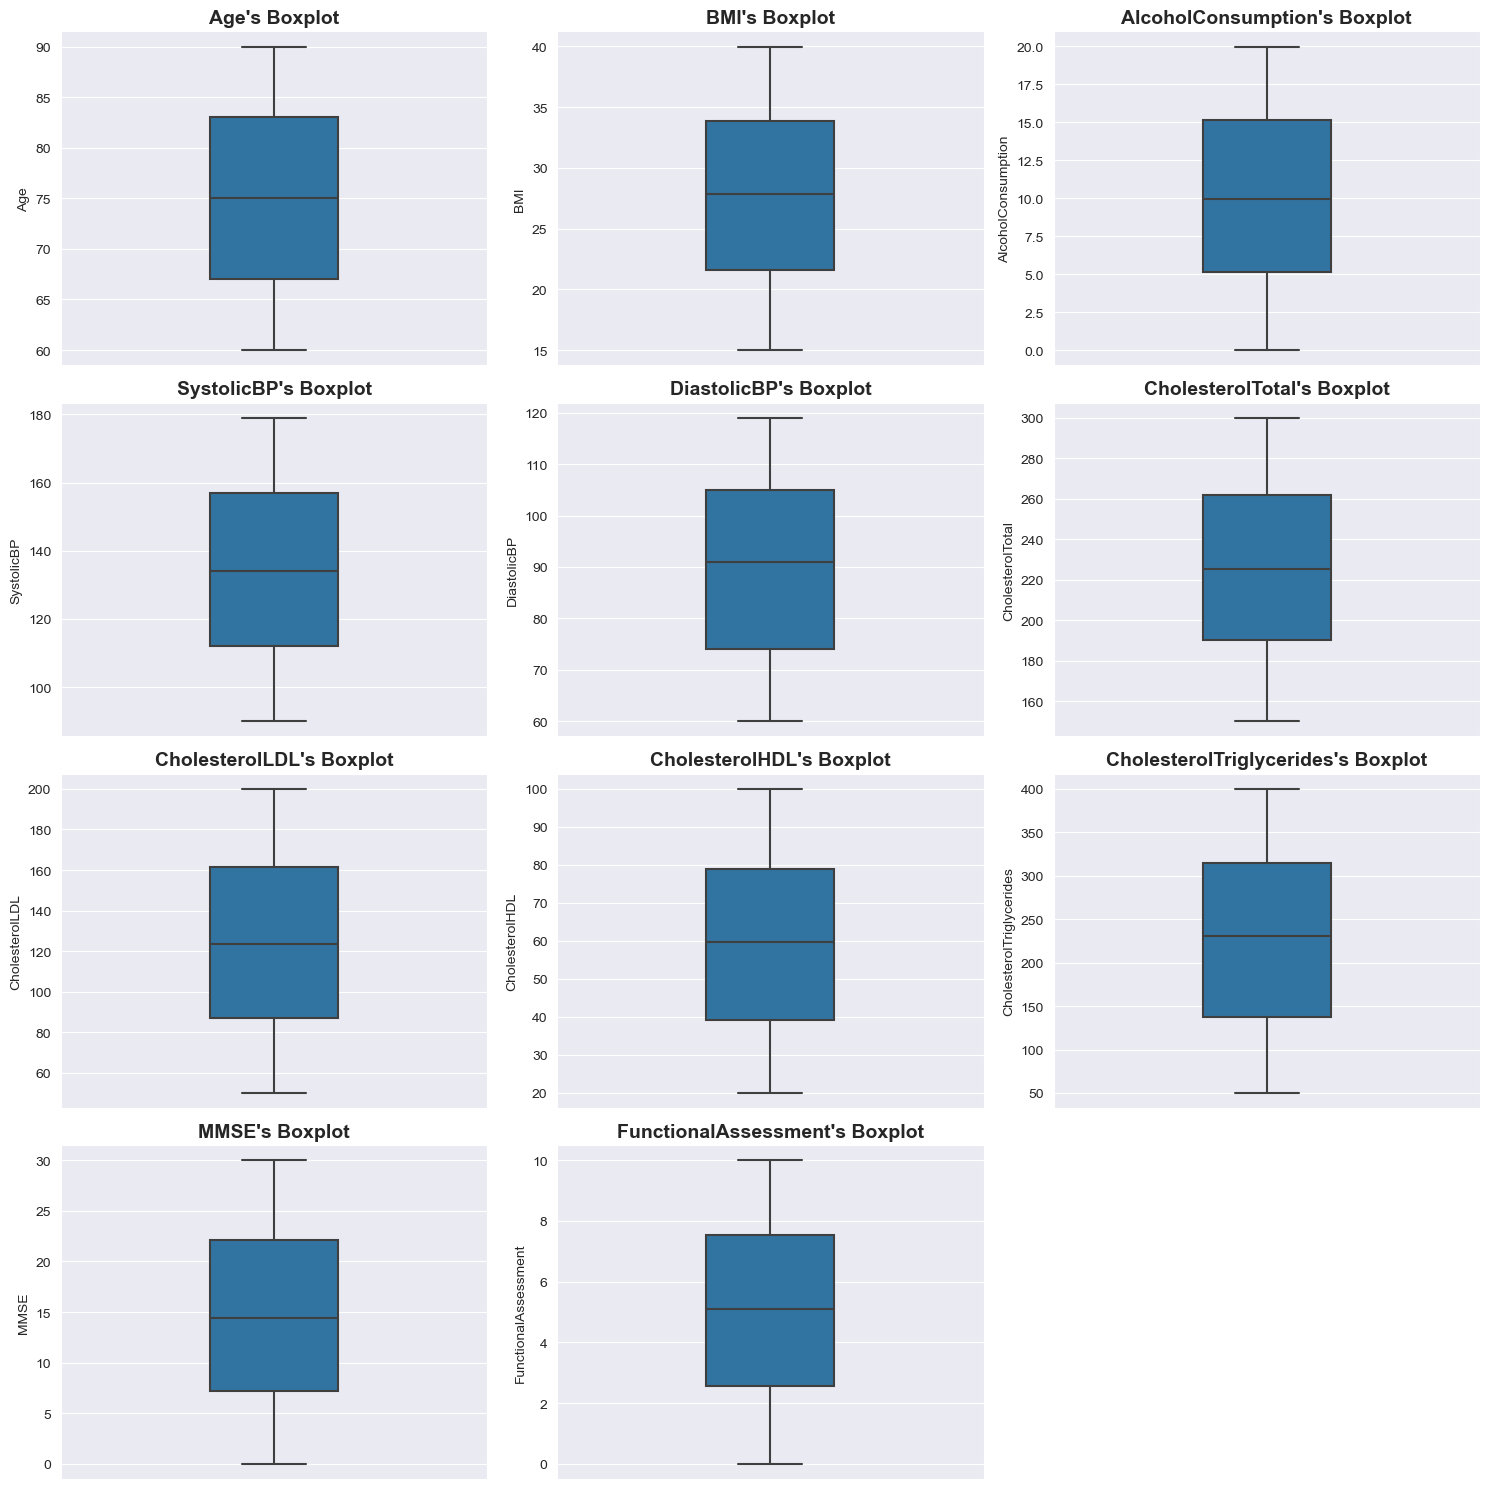

In [40]:
plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
for i, var in enumerate(numeric_features[1:], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data= df,
                y=var,
                width=0.3)
    plt.title(f"{var}'s Boxplot",
              fontsize=14,
              weight="bold")
plt.tight_layout()
plt.show()


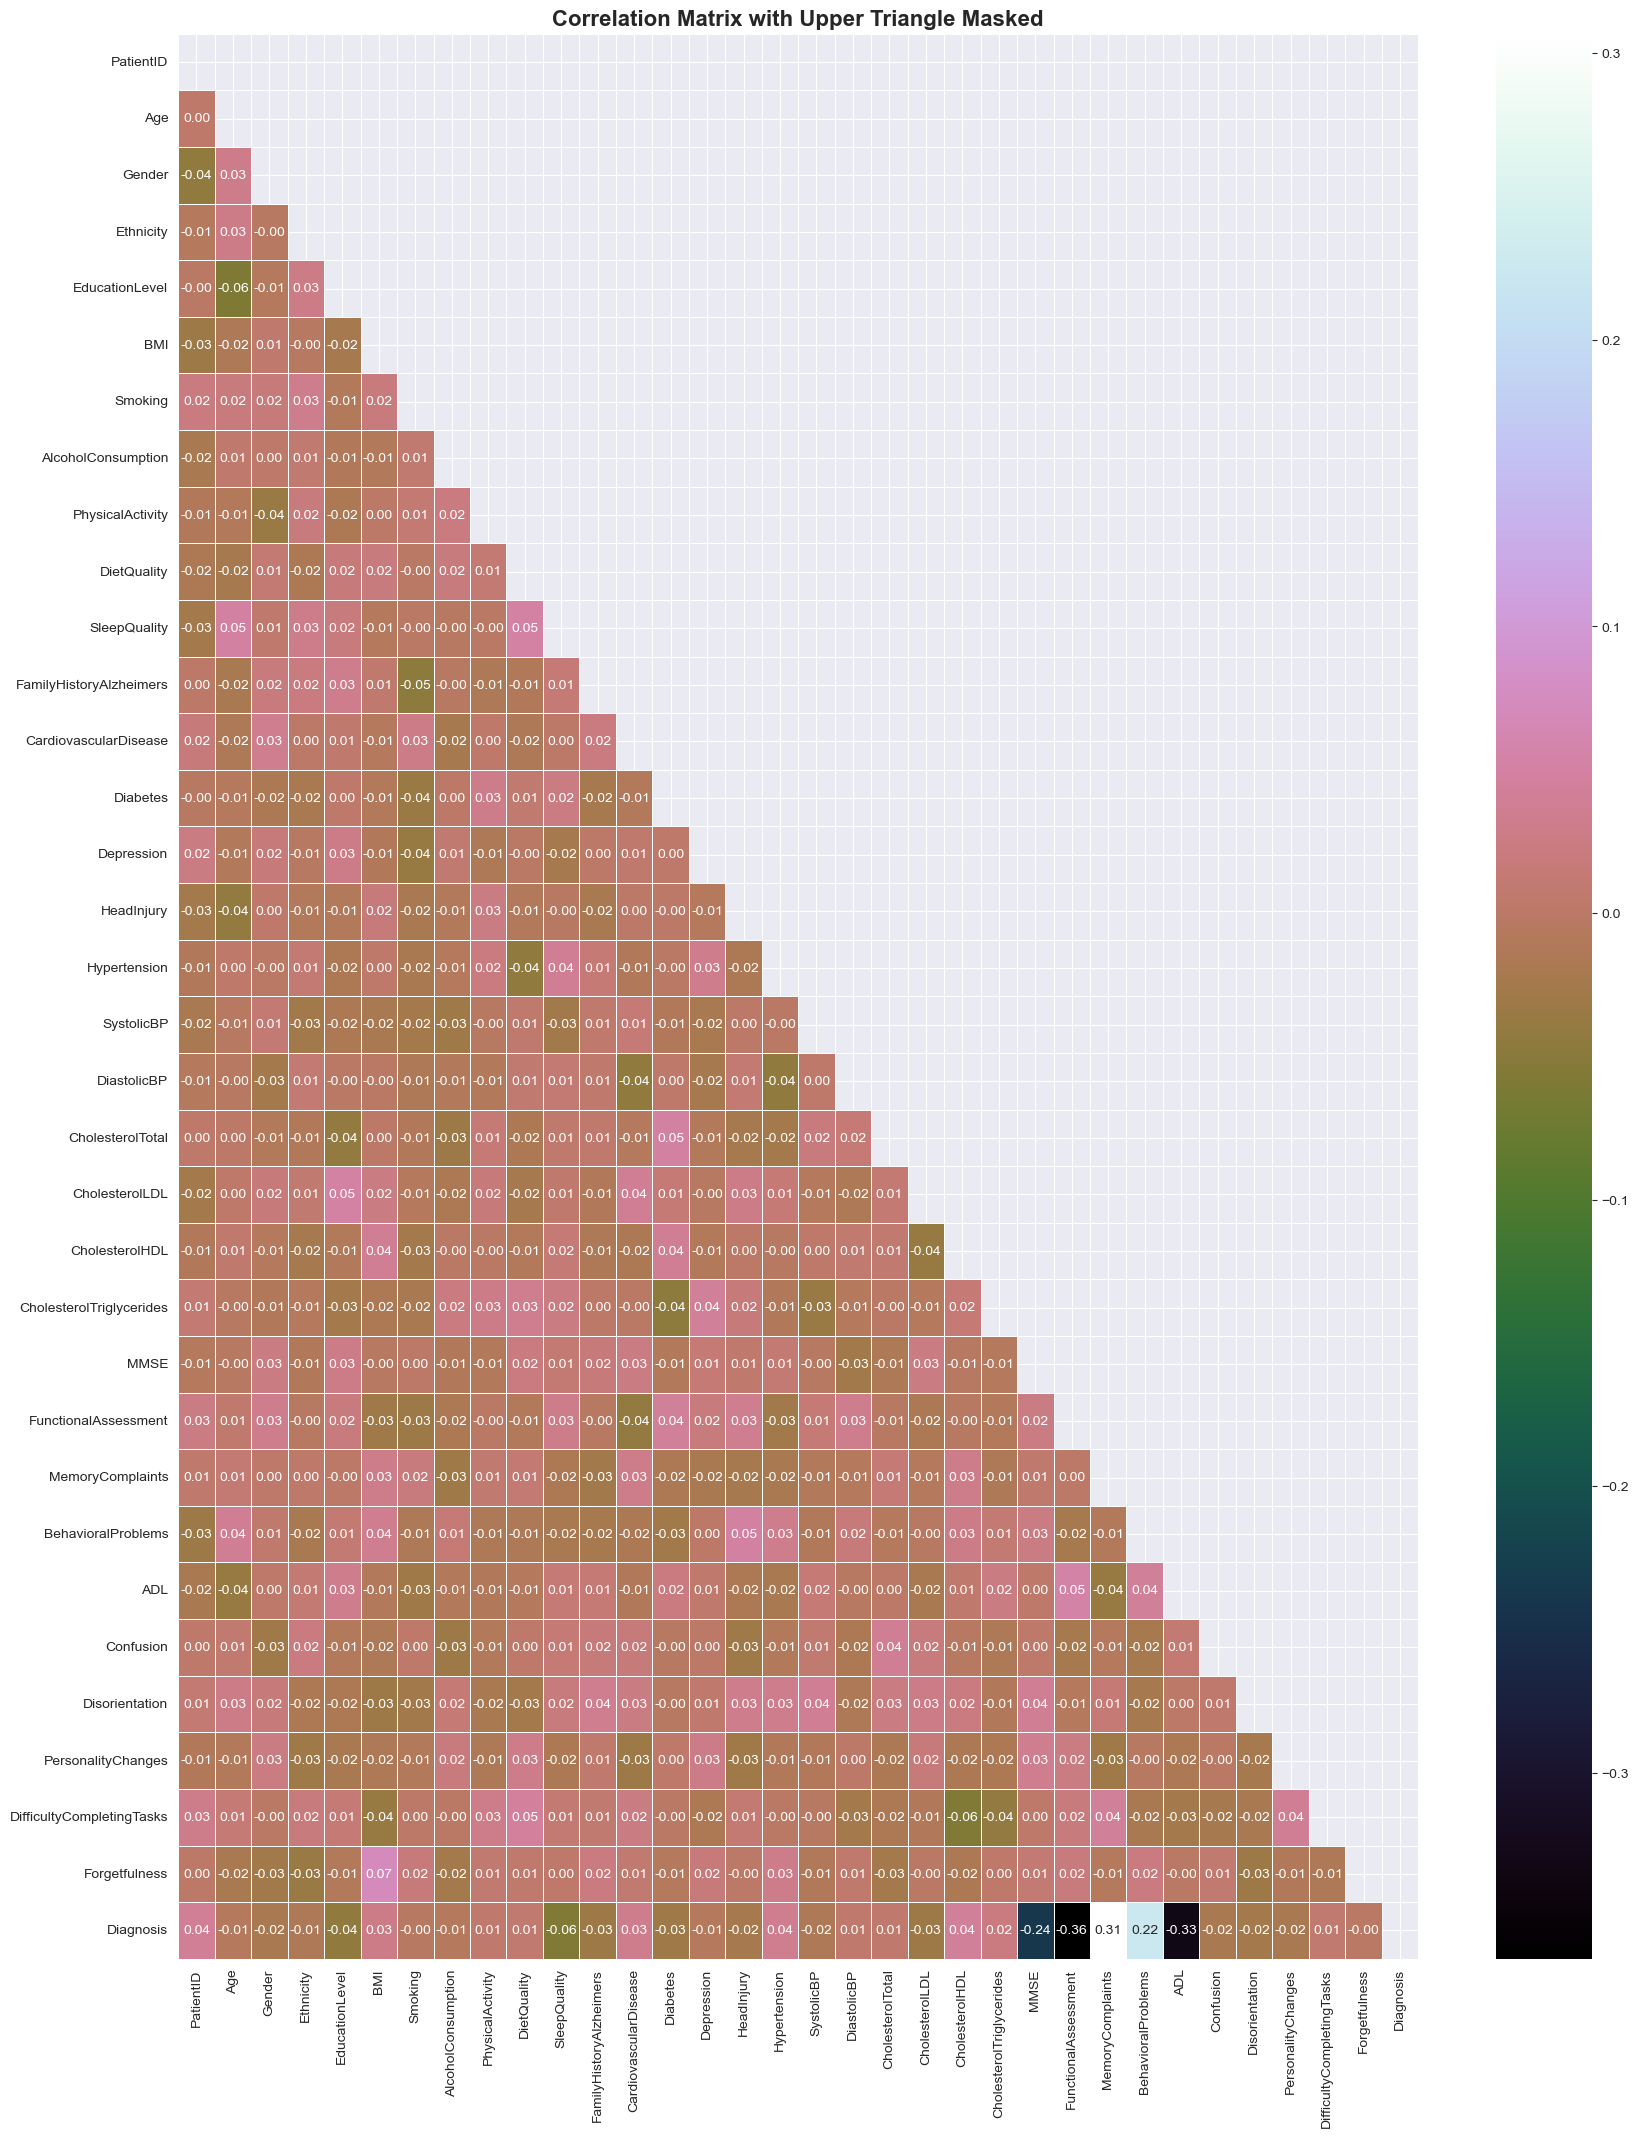

In [41]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="cubehelix", linewidths=0.5)
plt.title("Correlation Matrix with Upper Triangle Masked", fontsize=16, weight='bold')
plt.show()


In [42]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1).values
y = df['Diagnosis'].values

In [43]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(12)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [48]:
print(f"X Train :{X_train.shape}")
print(f"X Test :{X_test.shape}")
print(f"y Train :{y_train.shape}")
print(f"y Test :{y_test.shape}")

X Train :(1719, 12)
X Test :(430, 12)
y Train :(1719,)
y Test :(430,)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Object
xgb_model = XGBClassifier()

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
    'scale_pos_weight': [1, 2, 5]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='roc_auc',  # Use AUC-ROC for binary classification
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the randomized search model on your dataset (X, y)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0, 0.01, 0.1, 1],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [51]:
best_params = random_search.best_params_

# Create the final XGBClassifier model with the best parameters
xgb_tuned = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Train the final model on the full training data
xgb_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_tuned.predict(X_test)

# Get predicted probabilities (useful for ROC-AUC)
# y_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.727906976744186
Confusion Matrix:
[[186  91]
 [ 26 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       277
           1       0.58      0.83      0.68       153

    accuracy                           0.73       430
   macro avg       0.73      0.75      0.72       430
weighted avg       0.77      0.73      0.73       430

